In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

pd.set_option('display.max_column', None)

In [2]:
rice_df = pd.read_excel('rice_w2vec_3mer_dataset.xlsx')
rice_df = rice_df.drop(['circName','tissue','chr','start','end','strand','start_anno', 'circID',	'gene', 'isoform', 'width', 'detection_score', 'stress_detection_score', 'end_anno', 'antisense', 'algorithm', 'seq', 'exonSeq', 'predAA', 'miRNA','superCircRNARegion'], axis=1)

In [3]:
maize_df = pd.read_excel('maize_w2vec_3mer_dataset.xlsx')
maize_df = maize_df.drop(['circName','tissue','chr','start','end','strand','start_anno', 'circID',	'gene', 'isoform', 'width', 'detection_score', 'stress_detection_score', 'end_anno', 'antisense', 'algorithm', 'seq', 'exonSeq', 'predAA', 'miRNA','superCircRNARegion'], axis=1)

In [4]:
df = rice_df._append(maize_df, ignore_index = True)

In [5]:
df.head(2)

,stress,wc_3mer_1,wc_3mer_2,wc_3mer_3,wc_3mer_4,wc_3mer_5,wc_3mer_6,wc_3mer_7,wc_3mer_8,wc_3mer_9,wc_3mer_10,wc_3mer_11,wc_3mer_12,wc_3mer_13,wc_3mer_14,wc_3mer_15,wc_3mer_16,wc_3mer_17,wc_3mer_18,wc_3mer_19,wc_3mer_20,wc_3mer_21,wc_3mer_22,wc_3mer_23,wc_3mer_24,wc_3mer_25,wc_3mer_26,wc_3mer_27,wc_3mer_28,wc_3mer_29,wc_3mer_30,wc_3mer_31,wc_3mer_32,wc_3mer_33,wc_3mer_34,wc_3mer_35,wc_3mer_36,wc_3mer_37,wc_3mer_38,wc_3mer_39,wc_3mer_40,wc_3mer_41,wc_3mer_42,wc_3mer_43,wc_3mer_44,wc_3mer_45,wc_3mer_46,wc_3mer_47,wc_3mer_48,wc_3mer_49,wc_3mer_50,wc_3mer_51,wc_3mer_52,wc_3mer_53,wc_3mer_54,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,-,-8.660600,-17.171770,-20.124799,10.607480,-0.194991,1.568289,3.896590,7.622823,-2.833792,13.902024,0.901370,34.078852,7.308762,-22.336659,-6.828404,-8.725470,-8.180239,11.367680,-4.852785,-13.413974,-27.984812,3.740348,-7.190613,0.278378,-3.571699,9.958542,-5.320684,-2.488032,-18.012581,8.652445,-6.574689,9.127947,17.521066,23.482748,-23.985975,3.841062,3.032056,2.956034,-13.725450,0.347066,-6.722355,-20.930106,7.578275,-7.379258,27.989736,4.455084,13.222476,-2.601977,20.500052,-5.385517,11.915223,11.850148,11.701270,2.695746,-21.976927,-12.450649,-8.376489,-9.521074,28.565338,7.25165,-18.073032,-6.670159,-3.779034,1.302005
1,-,-4.623322,-42.058749,-73.491472,-51.222795,83.974883,-47.219114,-20.222901,29.187759,-17.144830,37.219912,23.798238,75.641953,4.870120,-70.222621,-82.996107,33.535224,76.461872,32.874154,-6.631312,-15.925581,-112.060691,-2.903517,2.948585,-62.907868,-66.399708,143.480368,-15.982585,-7.881710,71.077848,23.222897,8.554504,-6.788022,21.995903,6.561046,-37.298742,62.109498,-38.099622,-14.900497,-47.619993,43.699845,-59.877709,-77.359248,68.939810,-29.003005,74.874799,3.805252,61.622146,-95.765680,80.274650,-72.240870,34.492799,38.737359,89.357015,-14.975053,24.437080,-68.490463,20.158427,14.177653,81.437811,-4.52417,21.867150,-10.532807,-39.172970,63.339612


### Drought Analysis

In [6]:
df_drought = df.query('stress == "-" or stress == "drought"').replace('-', 0).replace('drought', 1)
df_drought.head()

<ipython-input-6-63aff892d1d9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_drought = df.query('stress == "-" or stress == "drought"').replace('-', 0).replace('drought', 1)


,stress,wc_3mer_1,wc_3mer_2,wc_3mer_3,wc_3mer_4,wc_3mer_5,wc_3mer_6,wc_3mer_7,wc_3mer_8,wc_3mer_9,wc_3mer_10,wc_3mer_11,wc_3mer_12,wc_3mer_13,wc_3mer_14,wc_3mer_15,wc_3mer_16,wc_3mer_17,wc_3mer_18,wc_3mer_19,wc_3mer_20,wc_3mer_21,wc_3mer_22,wc_3mer_23,wc_3mer_24,wc_3mer_25,wc_3mer_26,wc_3mer_27,wc_3mer_28,wc_3mer_29,wc_3mer_30,wc_3mer_31,wc_3mer_32,wc_3mer_33,wc_3mer_34,wc_3mer_35,wc_3mer_36,wc_3mer_37,wc_3mer_38,wc_3mer_39,wc_3mer_40,wc_3mer_41,wc_3mer_42,wc_3mer_43,wc_3mer_44,wc_3mer_45,wc_3mer_46,wc_3mer_47,wc_3mer_48,wc_3mer_49,wc_3mer_50,wc_3mer_51,wc_3mer_52,wc_3mer_53,wc_3mer_54,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,0,-8.660600,-17.171770,-20.124799,10.607480,-0.194991,1.568289,3.896590,7.622823,-2.833792,13.902024,0.901370,34.078852,7.308762,-22.336659,-6.828404,-8.725470,-8.180239,11.367680,-4.852785,-13.413974,-27.984812,3.740348,-7.190613,0.278378,-3.571699,9.958542,-5.320684,-2.488032,-18.012581,8.652445,-6.574689,9.127947,17.521066,23.482748,-23.985975,3.841062,3.032056,2.956034,-13.725450,0.347066,-6.722355,-20.930106,7.578275,-7.379258,27.989736,4.455084,13.222476,-2.601977,20.500052,-5.385517,11.915223,11.850148,11.701270,2.695746,-21.976927,-12.450649,-8.376489,-9.521074,28.565338,7.251650,-18.073032,-6.670159,-3.779034,1.302005
1,0,-4.623322,-42.058749,-73.491472,-51.222795,83.974883,-47.219114,-20.222901,29.187759,-17.144830,37.219912,23.798238,75.641953,4.870120,-70.222621,-82.996107,33.535224,76.461872,32.874154,-6.631312,-15.925581,-112.060691,-2.903517,2.948585,-62.907868,-66.399708,143.480368,-15.982585,-7.881710,71.077848,23.222897,8.554504,-6.788022,21.995903,6.561046,-37.298742,62.109498,-38.099622,-14.900497,-47.619993,43.699845,-59.877709,-77.359248,68.939810,-29.003005,74.874799,3.805252,61.622146,-95.765680,80.274650,-72.240870,34.492799,38.737359,89.357015,-14.975053,24.437080,-68.490463,20.158427,14.177653,81.437811,-4.524170,21.867150,-10.532807,-39.172970,63.339612
2,0,-23.932238,-17.885510,-54.202845,15.682650,-30.424396,13.430986,-15.981544,27.324571,24.285038,-17.966888,-16.194634,37.701170,4.238578,-22.092493,29.940143,-44.784022,-15.890628,53.919895,-35.991584,4.866899,-50.060959,-68.376555,2.019449,40.040754,23.633098,-45.153754,-14.515437,-25.419093,-56.664535,-39.742012,-16.468065,-3.389408,37.659704,40.421982,-37.147208,35.349384,42.317241,-1.470210,-29.414501,-14.095888,-3.773212,-17.580501,-3.677044,-4.241486,50.594313,12.794053,-3.864663,31.934474,59.930683,18.464463,-23.993488,38.375569,-29.350223,17.154355,-34.355928,13.556080,-50.537661,-30.186757,64.202528,54.450606,-24.835176,2.558572,-9.287752,-25.051924
3,0,-42.541243,-44.121847,-54.312436,-37.621338,53.242821,6.651359,-9.533580,22.141600,-23.691575,9.283776,-0.551763,43.312915,-13.855027,-56.051942,-42.767791,20.931579,80.680289,66.960003,-25.666703,11.878750,-63.000079,-27.702760,28.601403,-47.963099,-50.641645,66.162401,-53.409682,-59.539612,31.396312,5.907239,-32.506695,19.415766,26.903390,34.140679,4.857664,21.261436,-8.241523,-37.636076,-38.509444,49.406926,-5.393585,-60.979095,62.853344,13.631508,29.741310,-3.478798,32.412323,-39.634314,57.029251,-60.183020,20.314405,18.019867,68.430122,42.009534,74.941825,-37.716935,-19.644171,36.562092,62.745595,14.111886,46.643984,-12.691884,40.033801,-0.980058
4,0,-9.970732,20.265143,-4.832509,39.979788,-9.345131,-2.708796,13.024784,8.689754,20.483825,-24.362307,2.615833,39.985003,3.863229,-8.952802,50.770334,-37.559995,-60.421734,54.505319,3.034000,-12.866485,-28.546683,11.264910,-11.581891,28.874454,15.950151,-63.739680,2.241512,-6.666439,-101.564786,18.786861,3.056887,-7.124417,34.259654,35.142427,-25.501705,-1.030104,33.650719,-5.463998,-17.733441,-69.586419,-10.399177,-16.760990,-45.664405,-5.245687,37.056715,-26.661315,-35.275702,52.901876,43.110112,52.268147,3.463771,31.114444,-23.376492,-7.833504,-49.435175,33.124836,-4.937962,-21.755058,-0.672400,39.981767,-57.044162,-18.266155,-12.560292,-41.72014

In [7]:
df_drought['stress'].value_counts()

,count
stress,
0,70996
1,12030


In [8]:
drought_sequences = df_drought[df_drought['stress'] == 1]
control_sequences = df_drought[df_drought['stress'] == 0]

# creating sample
control_sample = control_sequences.sample(n=12030, random_state=42)

combined_sequences = pd.concat([drought_sequences, control_sample])

In [9]:
# Define X and y target variables
X = combined_sequences.drop(['stress'], axis=1)
y = combined_sequences['stress']

In [10]:
X

,wc_3mer_1,wc_3mer_2,wc_3mer_3,wc_3mer_4,wc_3mer_5,wc_3mer_6,wc_3mer_7,wc_3mer_8,wc_3mer_9,wc_3mer_10,wc_3mer_11,wc_3mer_12,wc_3mer_13,wc_3mer_14,wc_3mer_15,wc_3mer_16,wc_3mer_17,wc_3mer_18,wc_3mer_19,wc_3mer_20,wc_3mer_21,wc_3mer_22,wc_3mer_23,wc_3mer_24,wc_3mer_25,wc_3mer_26,wc_3mer_27,wc_3mer_28,wc_3mer_29,wc_3mer_30,wc_3mer_31,wc_3mer_32,wc_3mer_33,wc_3mer_34,wc_3mer_35,wc_3mer_36,wc_3mer_37,wc_3mer_38,wc_3mer_39,wc_3mer_40,wc_3mer_41,wc_3mer_42,wc_3mer_43,wc_3mer_44,wc_3mer_45,wc_3mer_46,wc_3mer_47,wc_3mer_48,wc_3mer_49,wc_3mer_50,wc_3mer_51,wc_3mer_52,wc_3mer_53,wc_3mer_54,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
5573,-14.239684,-19.791200,-34.806252,-10.467793,8.618444,-14.207393,-18.773497,18.264517,11.797228,-8.731274,4.484311,37.118186,0.925459,-35.302150,-12.236339,-1.158256,17.103202,18.706249,-25.526199,7.309167,-44.283097,-46.864021,14.421878,-10.496908,-11.027943,15.590789,-19.468354,-30.307012,10.163855,-14.794551,-4.570183,4.433239,27.979878,25.424899,3.146574,29.366591,22.134466,-13.114653,-10.065079,22.987930,-9.439889,-23.988325,24.192874,4.185316,26.714270,-2.772505,11.070476,1.240456,40.196678,-12.410423,-11.778736,31.399892,2.920079,16.887696,5.360155,-6.402772,-9.442812,10.948047,43.163758,12.192886,21.055839,-11.671457,0.627235,4.080567
5587,10.534444,3.715954,-18.887048,8.421080,-5.204782,-1.118611,-19.234898,0.776714,16.143631,4.276707,-0.720705,24.628327,13.822862,-6.006587,4.038017,-13.744580,-17.439011,-5.751457,-4.216100,-4.670021,-22.671975,0.992500,-5.236670,15.459219,3.548394,-4.056587,13.801010,13.326505,3.115667,-10.839315,8.431955,-6.639692,0.696475,7.667229,-28.915185,9.518683,3.664138,26.443591,-12.473522,-8.571820,-9.735226,-1.002809,-7.615463,-12.098301,24.883295,-6.642660,7.721223,3.343304,11.019679,-3.587294,1.063761,13.378201,-9.795716,-16.594507,-36.632966,-3.704283,-3.569767,-25.920925,23.517164,8.031341,-22.318264,10.049936,-29.169595,-0.364718
5597,0.003327,-23.729897,-33.739159,1.753346,-15.617544,-7.266784,-42.692240,35.321576,27.854834,9.942191,-15.408162,50.438483,5.119752,-33.851471,-27.869489,-17.344572,-0.243170,-7.735481,-33.932110,-4.669737,-47.195245,-32.005564,-11.072698,13.654799,-11.498052,53.864928,22.266188,40.585600,17.673472,3.338775,-18.562791,1.402851,49.607247,-4.591234,-49.158579,28.815736,-5.018226,35.509995,-21.253141,13.789468,-26.099051,-38.313563,20.846468,-7.137513,59.809617,29.158449,20.984507,-40.573101,20.987572,-19.378573,17.490891,30.216426,-9.222699,-18.588165,-83.264166,-24.412465,-8.156542,-22.559158,52.698958,-11.428096,-3.552933,15.771046,-57.021973,35.816885
5609,4.188823,-1.914453,-16.061759,2.376011,0.031587,-16.875134,11.033212,-0.845729,-10.988571,19.910574,10.874075,24.603406,13.707843,-8.421962,-10.491117,-4.570540,-17.175333,-25.083501,7.239153,-21.825533,-17.474716,20.998777,-9.991528,7.772002,5.080087,6.488916,-1.254618,8.848148,-0.205944,-3.981040,18.814639,4.641000,1.875933,15.936069,-9.879633,3.742748,0.131068,2.089511,-5.415809,4.621490,-7.005634,0.381258,4.499400,-9.070683,3.181900,-6.468477,14.445272,2.195914,11.375809,-12.328858,6.035166,8.283386,10.807171,-2.252894,-11.113070,-7.005440,9.119992,-12.763200,-0.264724,6.330788,-22.843209,-15.689881,-12.260485,14.053362
5619,-1.259198,-15.175152,-32.291070,-8.970846,-9.276863,-18.217519,-8.466039,12.985382,-12.468034,25.197049,8.877209,23.789072,8.866446,-8.481741,-31.591461,2.620715,3.991173,-38.615982,-3.299713,-15.765027,-17.425782,-0.467862,-8.023090,3.058498,-18.849420,45.754480,4.027663,12.335988,34.748222,-4.254405,0.271294,15.969496,13.296393,-3.825860,-16.888287,1.620855,-12.736563,2.109257,6.399634,23.335166,-9.360272,-9.295242,19.007629,0.154291,-0.061990,9.512256,25.404152,-29.596776,5.764486,-29.932977,18.850413,2.085276,15.424168,3.480642,-18.128669,-25.781794,3.283193,0.352009,10.115741,-13.701435,5.621698,5.162894,-19.166612,37.294715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [11]:
y

,stress
5573,1
5587,1
5597,1
5609,1
5619,1
...,...
76644,0
64923,0
27906,0
23616,0


In [12]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
components = tsne.fit_transform(X)

df_tsne = pd.DataFrame(components, columns=['tsne_components_1', 'tsne_components_2'])
df_tsne['stress'] = y
df_tsne.head()

,tsne_components_1,tsne_components_2,stress
0,41.192184,20.508812,1
1,13.689103,6.072901,1
2,-13.064773,22.917629,1
3,10.769565,-3.774410,1
4,32.791622,24.348261,1


In [14]:
import plotly.express as px

fig = px.scatter(df_tsne, x='tsne_components_1', y='tsne_components_2', color='stress')
fig.show()

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5)
df_tsne['dbscan_cluster'] = dbscan.fit_predict(df_tsne[['tsne_components_1', 'tsne_components_2']]).astype(str)

In [16]:
fig = px.scatter(df_tsne, x='tsne_components_1', y='tsne_components_2', color='dbscan_cluster')
fig.show()

### Multiclass Analysis

In [17]:
df_multiclass = df.query('stress == "-" or stress == "drought" or  stress == "cold"').replace('drought', 1).replace('cold', 2).replace('-', 0)
df_multiclass

<ipython-input-17-ea1d46d8d6b4>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,stress,wc_3mer_1,wc_3mer_2,wc_3mer_3,wc_3mer_4,wc_3mer_5,wc_3mer_6,wc_3mer_7,wc_3mer_8,wc_3mer_9,wc_3mer_10,wc_3mer_11,wc_3mer_12,wc_3mer_13,wc_3mer_14,wc_3mer_15,wc_3mer_16,wc_3mer_17,wc_3mer_18,wc_3mer_19,wc_3mer_20,wc_3mer_21,wc_3mer_22,wc_3mer_23,wc_3mer_24,wc_3mer_25,wc_3mer_26,wc_3mer_27,wc_3mer_28,wc_3mer_29,wc_3mer_30,wc_3mer_31,wc_3mer_32,wc_3mer_33,wc_3mer_34,wc_3mer_35,wc_3mer_36,wc_3mer_37,wc_3mer_38,wc_3mer_39,wc_3mer_40,wc_3mer_41,wc_3mer_42,wc_3mer_43,wc_3mer_44,wc_3mer_45,wc_3mer_46,wc_3mer_47,wc_3mer_48,wc_3mer_49,wc_3mer_50,wc_3mer_51,wc_3mer_52,wc_3mer_53,wc_3mer_54,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,0,-8.660600,-17.171770,-20.124799,10.607480,-0.194991,1.568289,3.896590,7.622823,-2.833792,13.902024,0.901370,34.078852,7.308762,-22.336659,-6.828404,-8.725470,-8.180239,11.367680,-4.852785,-13.413974,-27.984812,3.740348,-7.190613,0.278378,-3.571699,9.958542,-5.320684,-2.488032,-18.012581,8.652445,-6.574689,9.127947,17.521066,23.482748,-23.985975,3.841062,3.032056,2.956034,-13.725450,0.347066,-6.722355,-20.930106,7.578275,-7.379258,27.989736,4.455084,13.222476,-2.601977,20.500052,-5.385517,11.915223,11.850148,11.701270,2.695746,-21.976927,-12.450649,-8.376489,-9.521074,28.565338,7.251650,-18.073032,-6.670159,-3.779034,1.302005
1,0,-4.623322,-42.058749,-73.491472,-51.222795,83.974883,-47.219114,-20.222901,29.187759,-17.144830,37.219912,23.798238,75.641953,4.870120,-70.222621,-82.996107,33.535224,76.461872,32.874154,-6.631312,-15.925581,-112.060691,-2.903517,2.948585,-62.907868,-66.399708,143.480368,-15.982585,-7.881710,71.077848,23.222897,8.554504,-6.788022,21.995903,6.561046,-37.298742,62.109498,-38.099622,-14.900497,-47.619993,43.699845,-59.877709,-77.359248,68.939810,-29.003005,74.874799,3.805252,61.622146,-95.765680,80.274650,-72.240870,34.492799,38.737359,89.357015,-14.975053,24.437080,-68.490463,20.158427,14.177653,81.437811,-4.524170,21.867150,-10.532807,-39.172970,63.339612
2,0,-23.932238,-17.885510,-54.202845,15.682650,-30.424396,13.430986,-15.981544,27.324571,24.285038,-17.966888,-16.194634,37.701170,4.238578,-22.092493,29.940143,-44.784022,-15.890628,53.919895,-35.991584,4.866899,-50.060959,-68.376555,2.019449,40.040754,23.633098,-45.153754,-14.515437,-25.419093,-56.664535,-39.742012,-16.468065,-3.389408,37.659704,40.421982,-37.147208,35.349384,42.317241,-1.470210,-29.414501,-14.095888,-3.773212,-17.580501,-3.677044,-4.241486,50.594313,12.794053,-3.864663,31.934474,59.930683,18.464463,-23.993488,38.375569,-29.350223,17.154355,-34.355928,13.556080,-50.537661,-30.186757,64.202528,54.450606,-24.835176,2.558572,-9.287752,-25.051924
3,0,-42.541243,-44.121847,-54.312436,-37.621338,53.242821,6.651359,-9.533580,22.141600,-23.691575,9.283776,-0.551763,43.312915,-13.855027,-56.051942,-42.767791,20.931579,80.680289,66.960003,-25.666703,11.878750,-63.000079,-27.702760,28.601403,-47.963099,-50.641645,66.162401,-53.409682,-59.539612,31.396312,5.907239,-32.506695,19.415766,26.903390,34.140679,4.857664,21.261436,-8.241523,-37.636076,-38.509444,49.406926,-5.393585,-60.979095,62.853344,13.631508,29.741310,-3.478798,32.412323,-39.634314,57.029251,-60.183020,20.314405,18.019867,68.430122,42.009534,74.941825,-37.716935,-19.644171,36.562092,62.745595,14.111886,46.643984,-12.691884,40.033801,-0.980058
4,0,-9.970732,20.265143,-4.832509,39.979788,-9.345131,-2.708796,13.024784,8.689754,20.483825,-24.362307,2.615833,39.985003,3.863229,-8.952802,50.770334,-37.559995,-60.421734,54.505319,3.034000,-12.866485,-28.546683,11.264910,-11.581891,28.874454,15.950151,-63.739680,2.241512,-6.666439,-101.564786,18.786861,3.056887,-7.124417,34.259654,35.142427,-25.501705,-1.030104,33.650719,-5.463998,-17.733441,-69.586419,-10.399177,-16.760990,-45.664405,-5.245687,37.056715,-26.661315,-35.275702,52.901876,43.110112,52.268147,3.463771,31.114444,-23.376492,-7.833504,-49.435175,33.124836,-4.937962,-21.755058,-0.672400,39.981767,-57.044162,-18.266155,-12.560292,-41.72014

In [18]:
df_multiclass['stress'].value_counts()

,count
stress,
0,70996
1,12030
2,5724


In [19]:
# Define X and y (target) variables
X = df_multiclass.drop(['stress'], axis=1)
y = df_multiclass['stress']

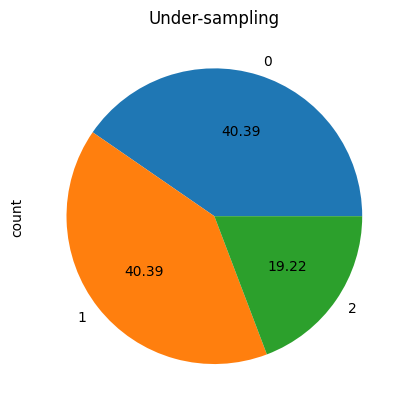

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = {0: 12030, 1: 12030, 2: 5724})

X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [21]:
X_res = X_res.reset_index(drop=True)
y_res = y_res.reset_index(drop=True)

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
components = tsne.fit_transform(X=X_res)

df_tsne = pd.DataFrame(components, columns=['tsne_components_1', 'tsne_components_2', 'tsne_components_3'])
df_tsne['stress'] = y_res
df_tsne.head()

,tsne_components_1,tsne_components_2,tsne_components_3,stress
0,-0.110801,0.160099,16.710791,0
1,-2.141860,0.304578,12.973537,0
2,17.746969,-6.473348,-0.149525,0
3,12.921842,-0.617477,-20.047749,0
4,-2.167434,-1.440807,11.433967,0


In [23]:
fig = px.scatter_3d(df_tsne, x='tsne_components_1', y='tsne_components_2', z='tsne_components_3', color='stress')
fig.show()